## Analysis of Robinhood Portfolio

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

In [41]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

# Magic
%matplotlib inline

## 1.) Data Collection (Portfolio fr. Robinhood)

Obtain portfolio from Robinhood using BeautifulSoup4. 

In [8]:
# Note: I had to manipulate some html text in able to extract a span that
#       does not contain an attribute. I named it as: class="filler".
#       Another one was added for Total Return, called: class="filler2"
html_doc = html_doc = html_doc = '''<div class="_35i1NVinE8wTOLz3sUynSw"><header class="_1rWpCWWqvbg316kwNPlwYi"><div class="_2YdFPnDqXSoDKmQtq28ML- _3QouEAcfZir2lV5xvc_C0b css-b8vnd1"><span class="css-zc0oik"><span class="css-13vshb9"><span class="css-1k2rdgi">Name</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1dw8qel" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2-4BkMtIykh6hAhu1CkOAi _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Symbol</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Shares</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_1aY3uEJAcFViGgVc3SRz4d _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Price</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="_2gJfY0FDaI4PWOsRbu1PPj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Average Cost</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="Ue-PUFBPXUbpP5zhTrFKT _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Total Return</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div><div class="atrP1y1y_C9ULHV4BSwFj _2Tpy7JyddSjzNzIEW6bQgP css-b8vnd1"><span class="css-h74qi0"><span class="css-13vshb9"><span class="css-1k2rdgi">Equity</span></span></span><svg class="_1-Dd_YXn_flSIsvKPPGJF3 css-1bummxh" width="8" height="5" viewBox="0 0 8 5"><polygon fill-rule="evenodd" points="50 9 54 14 46 14" transform="rotate(-180 27 7)"></polygon></svg></div></header><div><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB" rel="" href="/stocks/AGNC"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AGNC Investment</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AGNC</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$13.75</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$13.62</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$1.90</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$206.25</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/EADSY"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Airbus</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">EADSY</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">1</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$18.63</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$18.75</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$0.12</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$18.63</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BABA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Alibaba</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BABA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$257.90</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$246.09</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$118.14</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$2,579.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AMZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Amazon</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AMZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">1</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$3,110.00</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$2,978.48</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$131.52</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$3,110.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AAPL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Apple</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AAPL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">4</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$435.60</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$390.77</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$179.33</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$1,742.40</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/AZN"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">AstraZeneca</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">AZN</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$57.00</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$56.58</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$4.23</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$570.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BRK.B"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Berkshire Hathaway</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BRK.B</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">3.508</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$199.25</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$195.08</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$14.64</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$699.02</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/BA"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Boeing</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">BA</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">5</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$162.26</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$160.64</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$8.10</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$811.30</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/DAL"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Delta Air Lines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">DAL</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$25.24</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$25.03</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$3.18</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$378.60</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/XOM"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Exxon Mobil</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">XOM</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">20</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$42.20</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$42.41</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$4.20</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$844.00</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/PFE"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Pfizer</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">PFE</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">10</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$38.28</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$36.96</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$13.17</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$382.80</span></div></div></div></div></a><a class="rh-hyperlink qD5a4psv-CV7GnWdHxLvn n7JlFw29Ep8AXGLvITeC4 _3DXBkJzx8C8DnFG0wXGZ50 _2LZkydeTTkR9XsU9ETIiTB _2nPaH1Do76n14Fi4_DN3Ae" rel="" href="/stocks/LUV"><div class="_3sbUrrmoSkcTz1WFZ1cZ85"><div class="_2pf2FyleeFNQa8GgYJPzME"><div class="_37g6R7bjpn_GE9wrF8xPab"><div class="_1bZB-iudENk38jTXhs7BIB"><div class="_2YdFPnDqXSoDKmQtq28ML-"><span class="css-13vshb9"><span class="_2jKxrvkjD73sLQEfH5NTgT">Southwest Airlines</span></span></div></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2-4BkMtIykh6hAhu1CkOAi">LUV</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="filler">15</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_1aY3uEJAcFViGgVc3SRz4d">$31.51</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="_2gJfY0FDaI4PWOsRbu1PPj">$31.72</span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="Ue-PUFBPXUbpP5zhTrFKT"><svg class="_1gFu7pxJKo2ybEddsSwwbq _2mbK0Mw-5HM4q7eeuDqOau" width="9" height="8" viewBox="0 0 9 8"><polygon fill-rule="evenodd" points="4 0 8 7 0 7"></polygon></svg><span><span class="filler2">$3.11</span></span></span></div><div class="_1bZB-iudENk38jTXhs7BIB"><span class="atrP1y1y_C9ULHV4BSwFj">$472.65</span></div></div></div></div></a></div></div>'''

In [ ]:
soup = bs(html_doc, 'html.parser')
print(soup.prettify()[0:50000])

In [11]:
# Extracting headers
headers_txt = []
headers = soup.find_all('span', {'class':'css-1k2rdgi'})
for i in range(len(headers)):
    headers_txt.append(headers[i].text)
    
my_portfolio = pd.DataFrame(columns=[headers_txt])
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity


In [12]:
# Extracting company names
names_txt = []
names = soup.find_all('span', {'class':'_2jKxrvkjD73sLQEfH5NTgT'})

for i in range(len(names)):
    names_txt.append(names[i].text)
names_txt = np.array(names_txt)
#names_txt

In [13]:
# Extracting company tickers
ticks_txt = []
ticks = soup.find_all('span', {'class':'_2-4BkMtIykh6hAhu1CkOAi'})

for i in range(len(ticks)):
    ticks_txt.append(ticks[i].text)
ticks_txt = np.array(ticks_txt)
#ticks_txt

In [14]:
# Extracting company shares
shares_txt = []
shares = soup.find_all('span', {'class':'filler'})

for i in range(len(shares)):
    shares_txt.append(int(float(shares[i].text)))
shares_txt = np.array(shares_txt)
#shares_txt

In [15]:
# Extracting company prices
prices_txt = []
prices = soup.find_all('span', {'class':'_1aY3uEJAcFViGgVc3SRz4d'})

for i in range(len(prices)):
    prices_txt.append(prices[i].text)
prices_txt = np.array(prices_txt)
#prices_txt

In [16]:
# Extracting average price obtained
avg_txt = []
avg = soup.find_all('span', {'class':'_2gJfY0FDaI4PWOsRbu1PPj'})

for i in range(len(avg)):
    avg_txt.append(avg[i].text)
avg_txt = np.array(avg_txt)
#avg_txt

In [17]:
# Extracting total return
returns_txt = []
returns = soup.find_all('span', {'class':'filler2'})

for i in range(len(returns)):
    returns_txt.append(returns[i].text)
returns_txt = np.array(returns_txt)
#returns_txt

In [18]:
# Extracting equity
equity_txt = []
equity = soup.find_all('span', {'class':'atrP1y1y_C9ULHV4BSwFj'})

for i in range(len(ticks)):
    equity_txt.append(equity[i].text)
equity_txt = np.array(equity_txt)
#equity_txt

In [19]:
my_portfolio = pd.DataFrame({'Name':names_txt, 'Symbol':ticks_txt, 'Shares':shares_txt, 'Price':prices_txt, 'Average Cost':avg_txt, 'Total Return':returns_txt, 'Equity':equity_txt})
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,AGNC Investment,AGNC,15,$13.75,$13.62,$1.90,$206.25
1,Airbus,EADSY,1,$18.63,$18.75,$0.12,$18.63
2,Alibaba,BABA,10,$257.90,$246.09,$118.14,"$2,579.00"
3,Amazon,AMZN,1,"$3,110.00","$2,978.48",$131.52,"$3,110.00"
4,Apple,AAPL,4,$435.60,$390.77,$179.33,"$1,742.40"
5,AstraZeneca,AZN,10,$57.00,$56.58,$4.23,$570.00
6,Berkshire Hathaway,BRK.B,3,$199.25,$195.08,$14.64,$699.02
7,Boeing,BA,5,$162.26,$160.64,$8.10,$811.30
8,Delta Air Lines,DAL,15,$25.24,$25.03,$3.18,$378.60
9,Exxon Mobil,XOM,20,$42.20,$42.41,$4.20,$844.00


In [20]:
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          12 non-null     object
 1   Symbol        12 non-null     object
 2   Shares        12 non-null     int32 
 3   Price         12 non-null     object
 4   Average Cost  12 non-null     object
 5   Total Return  12 non-null     object
 6   Equity        12 non-null     object
dtypes: int32(1), object(6)
memory usage: 752.0+ bytes


## 2.) Data Cleaning

In [ ]:
# Take out all dollar signs in data
# Note: Running this a second time will create an error since the 
#       values would have already been converted to floats
dollar_sign = ['Price', 'Average Cost', 'Total Return', 'Equity']
for d in dollar_sign:
    my_portfolio[d] = my_portfolio[d].str.replace(",", "")
    my_portfolio[d] = my_portfolio[d].str.replace("$", "")
    my_portfolio[d] = pd.to_numeric(my_portfolio[d])

In [57]:
# Confirm that values needed has been converted to floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12 non-null     object 
 1   Symbol        12 non-null     object 
 2   Shares        12 non-null     int32  
 3   Price         12 non-null     float64
 4   Average Cost  12 non-null     float64
 5   Total Return  12 non-null     float64
 6   Equity        12 non-null     float64
dtypes: float64(4), int32(1), object(2)
memory usage: 752.0+ bytes


In [58]:
# Convert any '.' to '-' in symbols
#sym = my_portfolio['Symbol']
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [60]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Shares,Price,Average Cost,Total Return,Equity
0,AGNC Investment,AGNC,15,13.75,13.62,1.90,206.25
1,Airbus,EADSY,1,18.63,18.75,0.12,18.63
2,Alibaba,BABA,10,257.90,246.09,118.14,2579.00
3,Amazon,AMZN,1,3110.00,2978.48,131.52,3110.00
4,Apple,AAPL,4,435.60,390.77,179.33,1742.40
5,AstraZeneca,AZN,10,57.00,56.58,4.23,570.00
6,Berkshire Hathaway,BRK-B,3,199.25,195.08,14.64,699.02
7,Boeing,BA,5,162.26,160.64,8.10,811.30
8,Delta Air Lines,DAL,15,25.24,25.03,3.18,378.60
9,Exxon Mobil,XOM,20,42.20,42.41,4.20,844.00


## 3.) Data Collection (Historical Prices)

In [68]:
# Collect historical prices
tickers = my_portfolio['Symbol']
start_date = '2015-01-01'
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [64]:
my_data = my_data.dropna()
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2015-01-02 to 2020-08-03
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGNC    1406 non-null   float64
 1   EADSY   1406 non-null   float64
 2   BABA    1406 non-null   float64
 3   AMZN    1406 non-null   float64
 4   AAPL    1406 non-null   float64
 5   AZN     1406 non-null   float64
 6   BRK-B   1406 non-null   float64
 7   BA      1406 non-null   float64
 8   DAL     1406 non-null   float64
 9   XOM     1406 non-null   float64
 10  PFE     1406 non-null   float64
 11  LUV     1406 non-null   float64
dtypes: float64(12)
memory usage: 142.8 KB


In [65]:
sec_returns = np.log(my_data/my_data.shift(1))
sec_returns

sec_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2015-01-02 to 2020-08-03
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGNC    1405 non-null   float64
 1   EADSY   1405 non-null   float64
 2   BABA    1405 non-null   float64
 3   AMZN    1405 non-null   float64
 4   AAPL    1405 non-null   float64
 5   AZN     1405 non-null   float64
 6   BRK-B   1405 non-null   float64
 7   BA      1405 non-null   float64
 8   DAL     1405 non-null   float64
 9   XOM     1405 non-null   float64
 10  PFE     1405 non-null   float64
 11  LUV     1405 non-null   float64
dtypes: float64(12)
memory usage: 142.8 KB


In [66]:
sec_returns.head()

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
Date,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009453,0.000805,-0.025417,-0.020731,-0.028576,-0.007700,-0.014654,-0.006950,-0.016814,-0.027743,-0.005441,-0.024903
2015-01-06,0.000452,0.016753,0.022710,-0.023098,0.000094,-0.024635,-0.001089,-0.011848,-0.023855,-0.005331,0.008309,-0.028747
2015-01-07,-0.001357,0.028852,-0.011584,0.010544,0.013925,-0.001028,0.013797,0.015406,-0.005308,0.010082,0.013593,0.008368
2015-01-08,-0.003628,0.026547,0.028000,0.006813,0.037703,0.014290,0.016586,0.017528,0.025642,0.016508,0.020203,0.026126


In [67]:
sec_returns.tail()

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
Date,,,,,,,,,,,,
2020-07-28,-0.010264,0.015226,-0.007241,-0.018126,-0.016564,-0.004606,0.010252,0.003694,0.017108,-0.011870,0.038667,0.023818
2020-07-29,0.014631,-0.013037,0.013560,0.011005,0.018987,0.005666,0.011728,-0.028679,-0.008517,0.010962,0.006132,-0.015606
2020-07-30,-0.002200,0.027502,0.001148,0.006031,0.012028,0.021829,-0.010801,-0.024760,-0.030796,-0.050302,-0.003607,-0.026456
2020-07-31,-0.001469,-0.036289,-0.006829,0.036294,0.099564,-0.037129,0.007588,-0.024693,0.001202,0.005003,-0.006734,-0.002264
2020-08-03,0.010241,0.027205,0.027194,-0.016822,0.024885,0.018473,0.017619,0.026667,0.009169,0.004032,-0.003384,0.022092


## Data Analysis

In [69]:
sec_returns

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
Date,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.009453,0.000805,-0.025417,-0.020731,-0.028576,-0.007700,-0.014654,-0.006950,-0.016814,-0.027743,-0.005441,-0.024903
2015-01-06,0.000452,0.016753,0.022710,-0.023098,0.000094,-0.024635,-0.001089,-0.011848,-0.023855,-0.005331,0.008309,-0.028747
2015-01-07,-0.001357,0.028852,-0.011584,0.010544,0.013925,-0.001028,0.013797,0.015406,-0.005308,0.010082,0.013593,0.008368
2015-01-08,-0.003628,0.026547,0.028000,0.006813,0.037703,0.014290,0.016586,0.017528,0.025642,0.016508,0.020203,0.026126
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,-0.010264,0.015226,-0.007241,-0.018126,-0.016564,-0.004606,0.010252,0.003694,0.017108,-0.011870,0.038667,0.023818
2020-07-29,0.014631,-0.013037,0.013560,0.011005,0.018987,0.005666,0.011728,-0.028679,-0.008517,0.010962,0.006132,-0.015606
2020-07-30,-0.002200,0.027502,0.001148,0.006031,0.012028,0.021829,-0.010801,-0.024760,-0.030796,-0.050302,-0.003607,-0.026456


In [70]:
for t in tickers:

    
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    mean_return = round((sec_returns[t].mean()*250)*100, 4)
    std_return = round((sec_returns[t].std()*250**.5)*100, 4)
    print("Annual Return:", mean_return, "%")
    print("Annual Risk:", std_return, "%")
    

    
    


# AGNC
DAILY
Daily Return: 0.0119 %
Daily Risk: 1.5457 %

ANNUAL
Annual Return: 2.9814 %
Annual Risk: 24.4391 %

# EADSY
DAILY
Daily Return: 0.0378 %
Daily Risk: 2.4359 %

ANNUAL
Annual Return: 9.4532 %
Annual Risk: 38.5145 %

# BABA
DAILY
Daily Return: 0.0649 %
Daily Risk: 2.0549 %

ANNUAL
Annual Return: 16.2311 %
Annual Risk: 32.491 %

# AMZN
DAILY
Daily Return: 0.1645 %
Daily Risk: 1.9192 %

ANNUAL
Annual Return: 41.1245 %
Annual Risk: 30.3447 %

# AAPL
DAILY
Daily Return: 0.1048 %
Daily Risk: 1.8169 %

ANNUAL
Annual Return: 26.2 %
Annual Risk: 28.7279 %

# AZN
DAILY
Daily Return: 0.0543 %
Daily Risk: 1.6067 %

ANNUAL
Annual Return: 13.5825 %
Annual Risk: 25.4034 %

# BRK-B
DAILY
Daily Return: 0.0206 %
Daily Risk: 1.3188 %

ANNUAL
Annual Return: 5.1517 %
Annual Risk: 20.8518 %

# BA
DAILY
Daily Return: 0.0259 %
Daily Risk: 2.6509 %

ANNUAL
Annual Return: 6.4728 %
Annual Risk: 41.9143 %

# DAL
DAILY
Daily Return: -0.0401 %
Daily Risk: 2.585 %

ANNUAL
Annual Return: -10.025 %
Annual 

In [71]:
sec_returns.idxmin() 

AGNC    2020-03-12
EADSY   2020-03-18
BABA    2015-01-29
AMZN    2020-03-12
AAPL    2020-03-16
AZN     2017-07-27
BRK-B   2020-03-12
BA      2020-03-16
DAL     2020-03-18
XOM     2020-03-09
PFE     2020-03-16
LUV     2020-03-12
dtype: datetime64[ns]

In [72]:
sec_returns.idxmax()

AGNC    2020-03-25
EADSY   2020-03-26
BABA    2017-06-08
AMZN    2015-04-24
AAPL    2020-03-13
AZN     2019-02-14
BRK-B   2020-03-13
BA      2020-03-25
DAL     2020-03-24
XOM     2020-03-24
PFE     2020-03-13
LUV     2020-03-13
dtype: datetime64[ns]

In [73]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()
return_cov

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
AGNC,0.000239,0.000187,0.000054,0.000052,0.000081,0.000052,0.000084,0.000220,0.000202,0.000114,0.000055,0.000143
EADSY,0.000187,0.000593,0.000175,0.000127,0.000175,0.000126,0.000176,0.000389,0.000359,0.000198,0.000110,0.000267
BABA,0.000054,0.000175,0.000422,0.000195,0.000177,0.000093,0.000105,0.000179,0.000167,0.000107,0.000078,0.000136
AMZN,0.000052,0.000127,0.000195,0.000368,0.000188,0.000090,0.000101,0.000147,0.000113,0.000096,0.000084,0.000106
AAPL,0.000081,0.000175,0.000177,0.000188,0.000330,0.000108,0.000141,0.000219,0.000184,0.000141,0.000103,0.000157
AZN,0.000052,0.000126,0.000093,0.000090,0.000108,0.000258,0.000077,0.000113,0.000101,0.000080,0.000091,0.000089
BRK-B,0.000084,0.000176,0.000105,0.000101,0.000141,0.000077,0.000174,0.000211,0.000194,0.000149,0.000101,0.000160
BA,0.000220,0.000389,0.000179,0.000147,0.000219,0.000113,0.000211,0.000703,0.000435,0.000250,0.000133,0.000339
DAL,0.000202,0.000359,0.000167,0.000113,0.000184,0.000101,0.000194,0.000435,0.000668,0.000194,0.000117,0.000448
XOM,0.000114,0.000198,0.000107,0.000096,0.000141,0.000080,0.000149,0.000250,0.000194,0.000278,0.000096,0.000156


In [74]:
# Covariance 
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()*250
return_cov

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
AGNC,0.059727,0.046766,0.013436,0.013070,0.020297,0.012961,0.020880,0.055101,0.050459,0.028600,0.013729,0.035725
EADSY,0.046766,0.148336,0.043801,0.031774,0.043727,0.031456,0.044013,0.097364,0.089675,0.049534,0.027536,0.066837
BABA,0.013436,0.043801,0.105566,0.048658,0.044206,0.023359,0.026363,0.044830,0.041628,0.026853,0.019432,0.033917
AMZN,0.013070,0.031774,0.048658,0.092080,0.046929,0.022391,0.025201,0.036708,0.028306,0.023986,0.020998,0.026503
AAPL,0.020297,0.043727,0.044206,0.046929,0.082529,0.026966,0.035240,0.054775,0.045978,0.035302,0.025856,0.039321
AZN,0.012961,0.031456,0.023359,0.022391,0.026966,0.064533,0.019240,0.028157,0.025263,0.019954,0.022744,0.022372
BRK-B,0.020880,0.044013,0.026363,0.025201,0.035240,0.019240,0.043480,0.052660,0.048439,0.037276,0.025159,0.039963
BA,0.055101,0.097364,0.044830,0.036708,0.054775,0.028157,0.052660,0.175681,0.108868,0.062546,0.033261,0.084629
DAL,0.050459,0.089675,0.041628,0.028306,0.045978,0.025263,0.048439,0.108868,0.167053,0.048549,0.029184,0.112113
XOM,0.028600,0.049534,0.026853,0.023986,0.035302,0.019954,0.037276,0.062546,0.048549,0.069435,0.024006,0.038890


In [75]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = sec_returns.corr()
return_corr

,AGNC,EADSY,BABA,AMZN,AAPL,AZN,BRK-B,BA,DAL,XOM,PFE,LUV
AGNC,1.000000,0.496843,0.169203,0.176239,0.289096,0.208762,0.409729,0.537914,0.505152,0.444111,0.261344,0.410223
EADSY,0.496843,1.000000,0.350022,0.271872,0.395208,0.321505,0.548038,0.603130,0.569664,0.488076,0.332626,0.486998
BABA,0.169203,0.350022,1.000000,0.493523,0.473603,0.283013,0.389128,0.329191,0.313469,0.313644,0.278245,0.292951
AMZN,0.176239,0.271872,0.493523,1.000000,0.538334,0.290470,0.398279,0.288616,0.228226,0.299970,0.321927,0.245103
AAPL,0.289096,0.395208,0.473603,0.538334,1.000000,0.369510,0.588285,0.454898,0.391579,0.466350,0.418726,0.384113
AZN,0.208762,0.321505,0.283013,0.290470,0.369510,1.000000,0.363212,0.264440,0.243314,0.298090,0.416536,0.247146
BRK-B,0.409729,0.548038,0.389128,0.398279,0.588285,0.363212,1.000000,0.602522,0.568365,0.678420,0.561338,0.537831
BA,0.537914,0.603130,0.329191,0.288616,0.454898,0.264440,0.602522,1.000000,0.635491,0.566302,0.369190,0.566620
DAL,0.505152,0.569664,0.313469,0.228226,0.391579,0.243314,0.568365,0.635491,1.000000,0.450775,0.332188,0.769778
XOM,0.444111,0.488076,0.313644,0.299970,0.466350,0.298090,0.678420,0.566302,0.450775,1.000000,0.423843,0.414177


In [76]:
no_assets = len(tickers)
no_assets

12

In [77]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*sec_returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

#print(np.sum(weights))
#pflio_returns, pflio_volatilities

In [78]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [79]:
pflio_scenarios.head()
pflio_scenarios['Return']

1702   -0.005607
1199    0.007149
7615    0.010582
3036    0.011330
7012    0.012390
          ...   
4313    0.170381
6655    0.170400
532     0.170718
7956    0.173124
1847    0.180036
Name: Return, Length: 10000, dtype: float64

In [80]:
pflio_scenarios.tail(3500)

,Return,Volatility
6470,0.096156,0.202474
925,0.096158,0.207461
4973,0.096168,0.220827
808,0.096174,0.213069
214,0.096174,0.216033
...,...,...
4313,0.170381,0.199666
6655,0.170400,0.219508
532,0.170718,0.207300
7956,0.173124,0.217095


Text(0, 0.5, 'Expected Return')

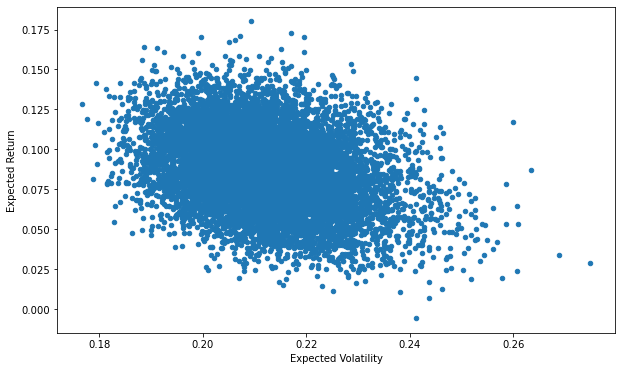

In [81]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [86]:
# For Testing purposes
print(pflio_wei[1874])
print(tickers)
print(np.sum(pflio_wei[1874]))

[0.02402618 0.08516888 0.05118552 0.06091823 0.05895182 0.10182333
 0.0730755  0.16136311 0.08457309 0.14839993 0.11895229 0.03156212]
0      AGNC
1     EADSY
2      BABA
3      AMZN
4      AAPL
5       AZN
6     BRK-B
7        BA
8       DAL
9       XOM
10      PFE
11      LUV
Name: Symbol, dtype: object
1.0


## Data Visualization

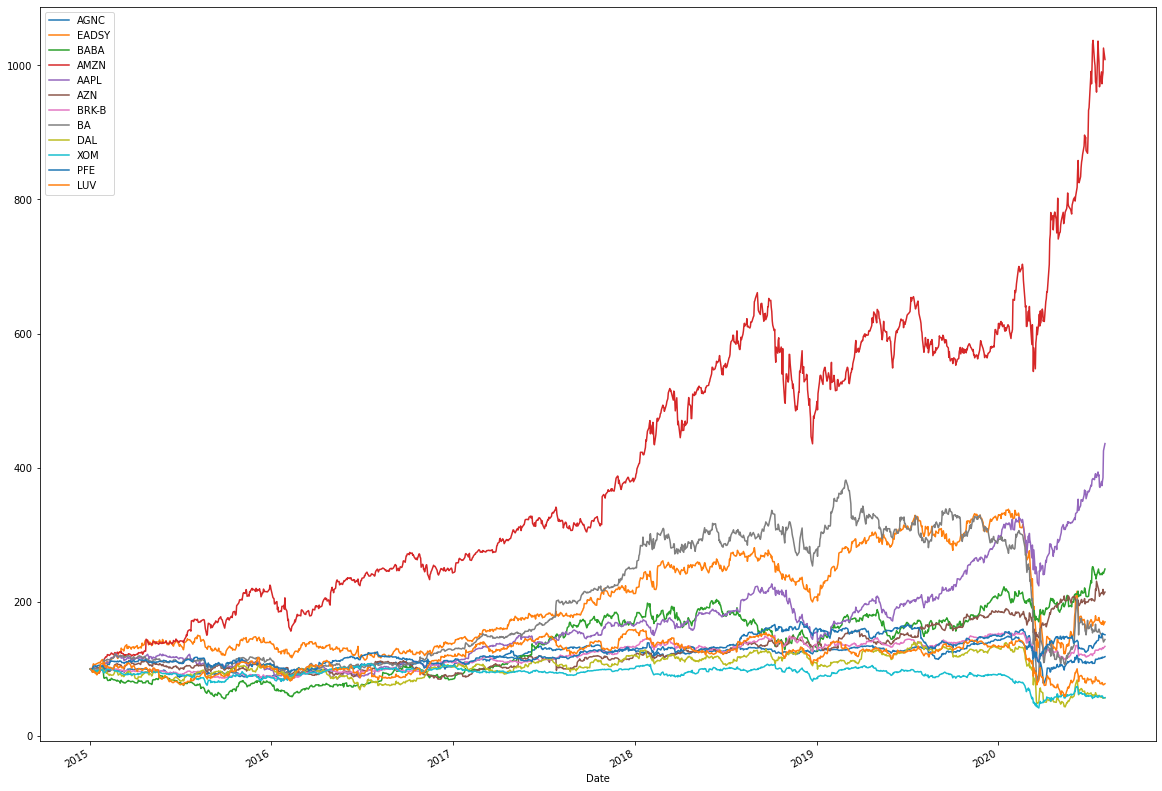

In [83]:
(my_data/my_data.iloc[0]*100).plot(figsize=(20,15))

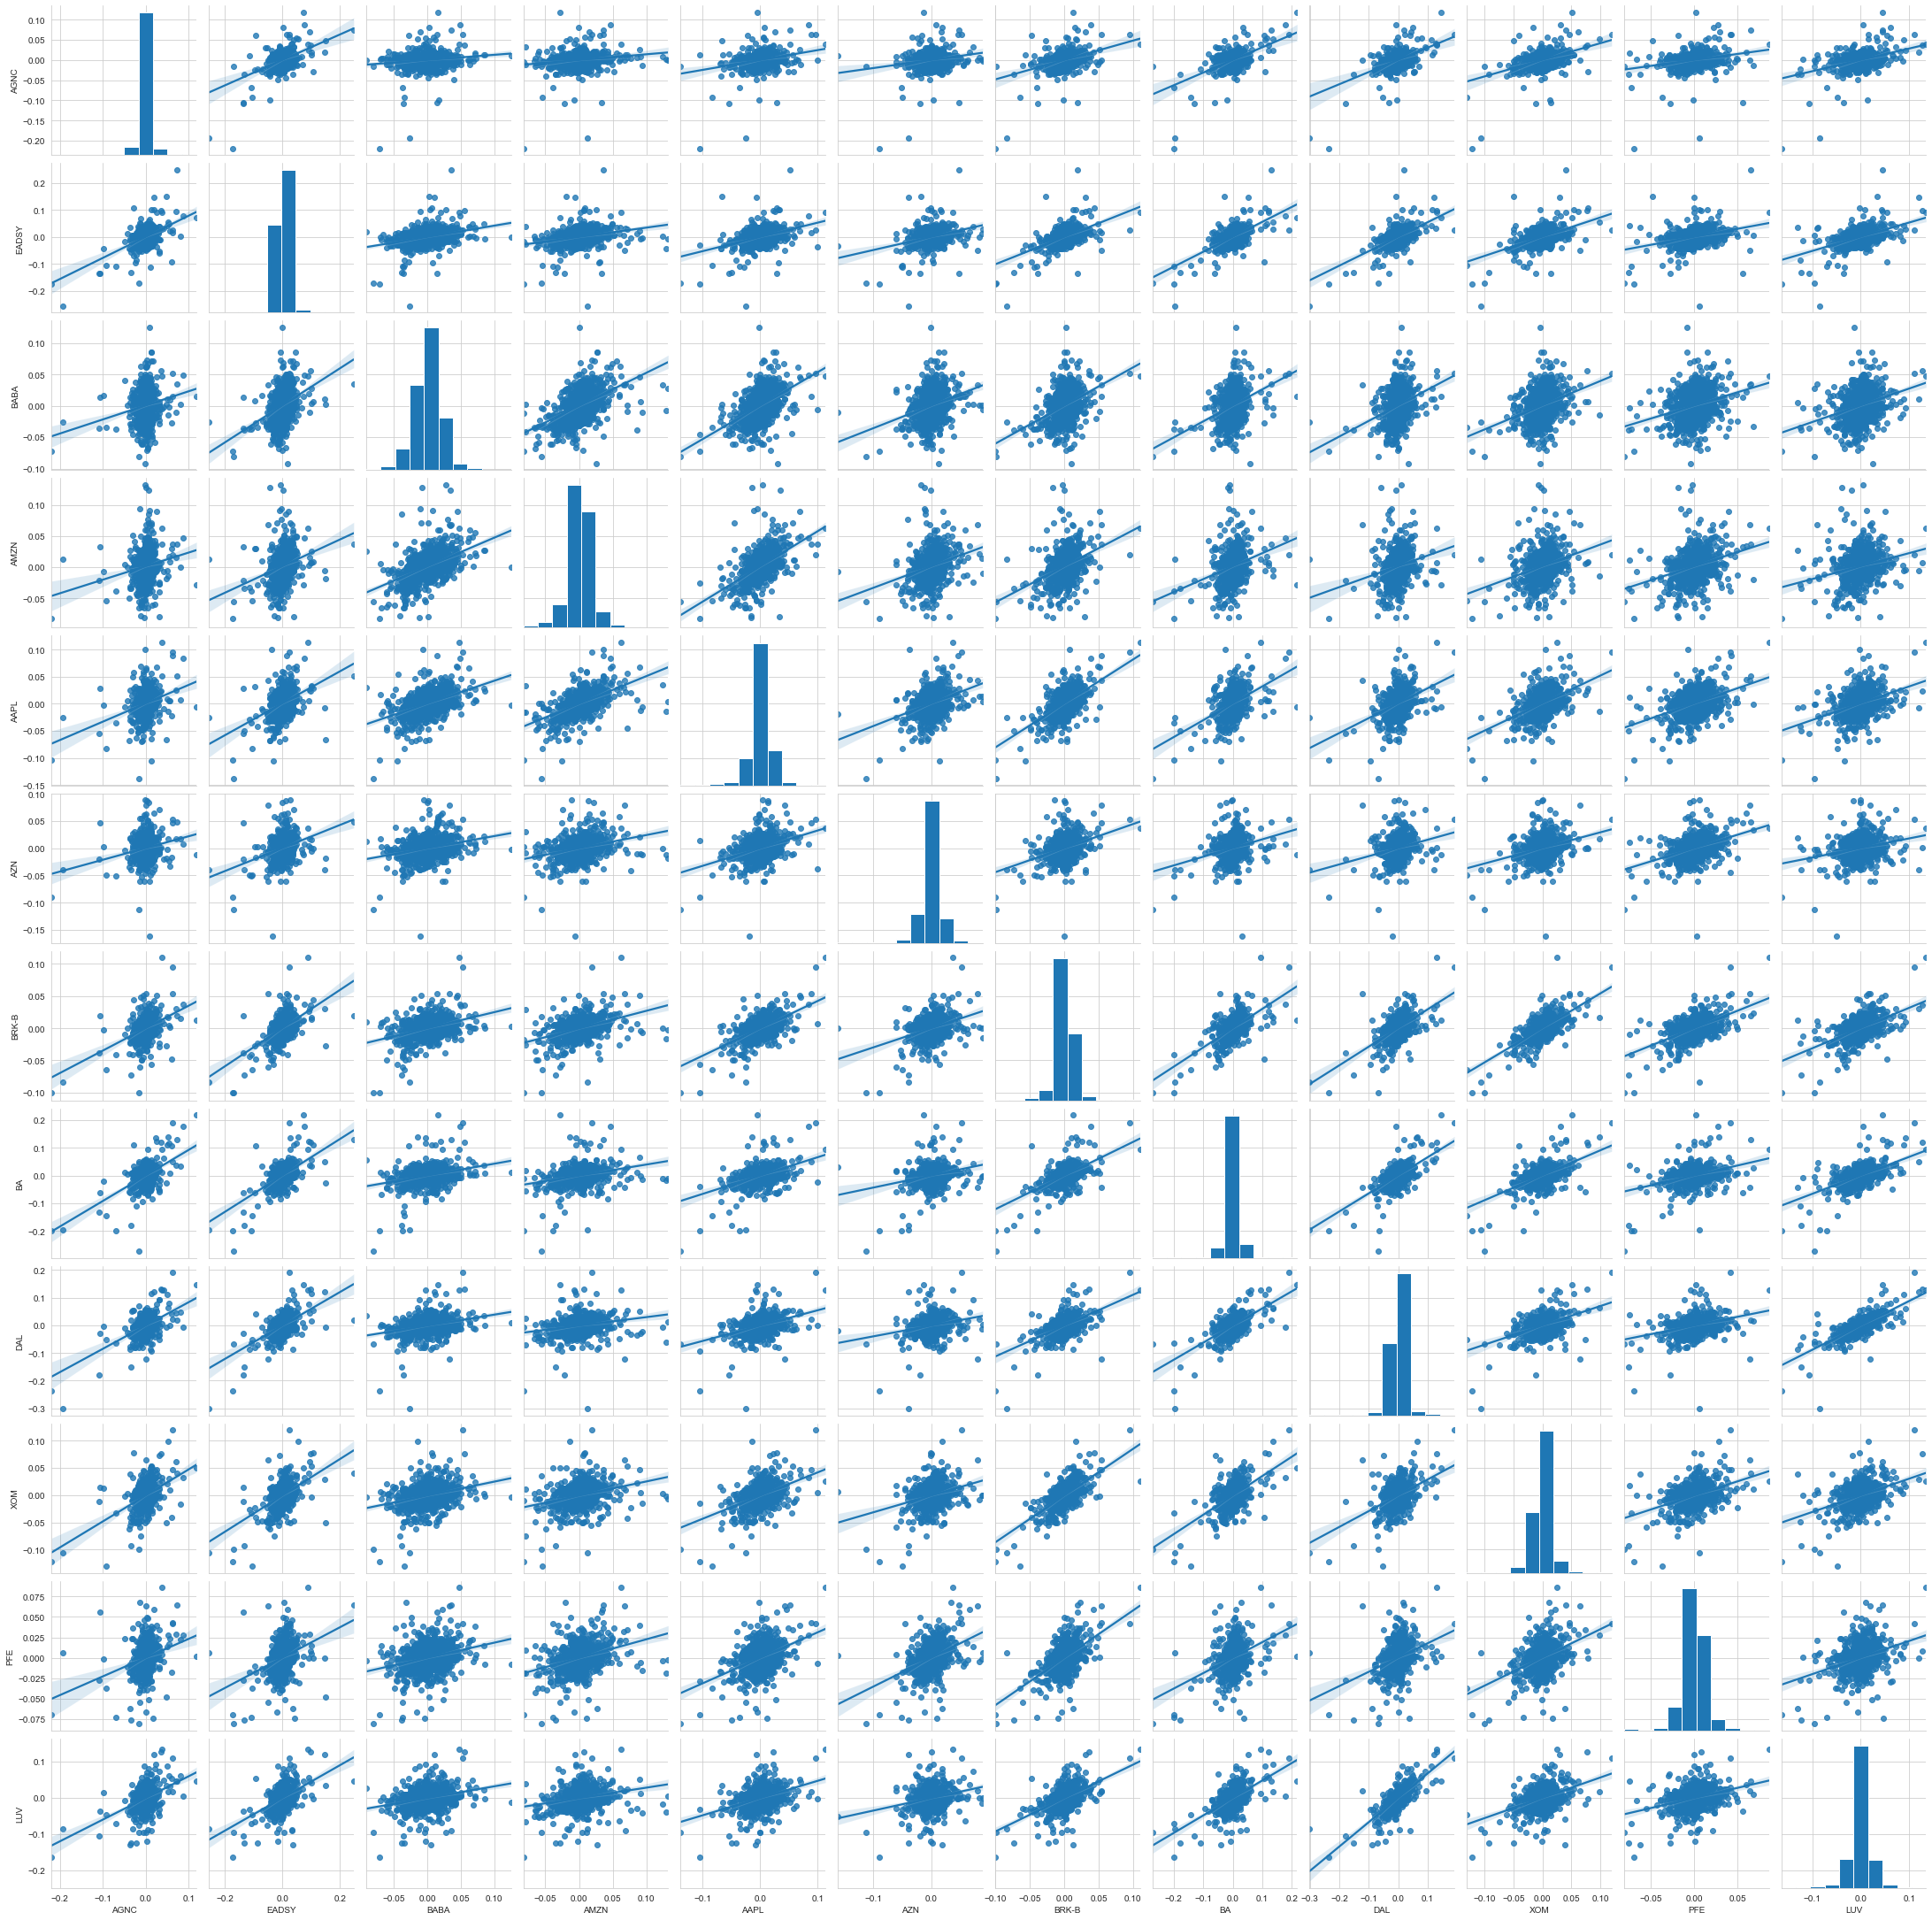

In [84]:
sns.set_style('whitegrid')
sns.pairplot(sec_returns[1:], kind="reg")

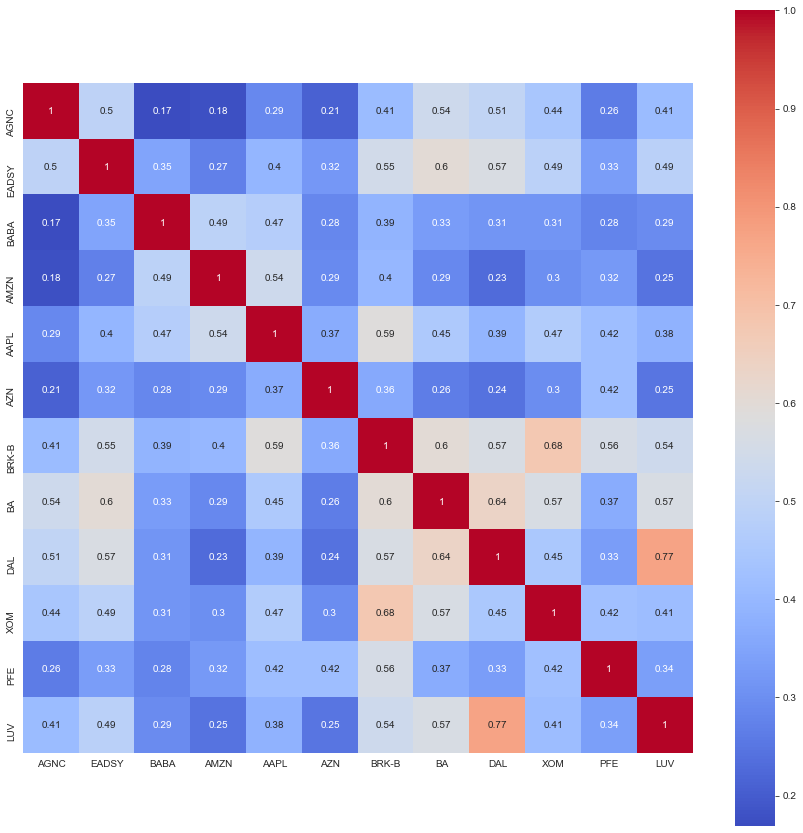

In [85]:
plt.subplots(figsize=(15, 15))
sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
#plt.show()